<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>May 2018: intro
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Translation of code in the introduction chapter of <a href="https://mitpress.mit.edu/books/functional-differential-geometry">Functional Differential Geometry</a> book.
</div>

In [46]:
from operator import attrgetter
from sympy import *
init_printing()

---

In [2]:
f, L, w = Function('f'), Function('L'), Function('w') # abstract, Lagrangian and path functions, respectively
t, q, q_point = symbols(r't q \dot{q}') # symbols for the Leibniz notation

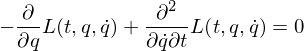

In [3]:
Lagrangian_eq = Eq(Derivative(Derivative(L(t, q, q_point),q_point,evaluate=False),
                              t, evaluate=False) - L(t,q,q_point).diff(q),0)
Lagrangian_eq # compact Lagrangian equation, implicit indeed

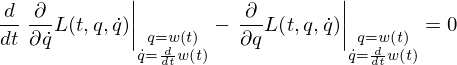

In [4]:
Lagrangian_eq = Eq(Derivative(Subs(L(t, q, q_point).diff(q_point), [q,q_point], [w(t),w(t).diff(t)]),t) - 
                   Subs(L(t,q,q_point).diff(q), [q,q_point], [w(t),w(t).diff(t)]),0)
Lagrangian_eq

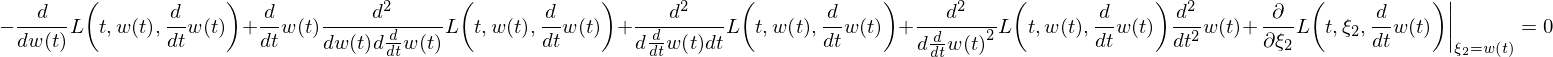

In [5]:
Lagrangian_eq.doit() # a complex explosion by automatic computation

In [6]:
def diff_positional(f, i):
    a = IndexedBase('a')
    der = f.diff(f.args[i])
    def D(*args):
        #return Lambda([a[i] for i in range(len(f.args))], 
        return der.subs({f.args[i]:args[i] for i in range(len(f.args))}, simultaneous=True)
    return D # function D is a function of the meta-language, not in the object language

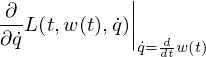

In [7]:
diff_positional(L(t, q, q_point), 2)(t,w(t),w(t).diff(t)) # :/

In [8]:
def diff_positional(f, i):
    return Function(r'\partial_{{{}}}{}'.format(i, str(f))) # the \partial is just a symbol, it hasn't meaning

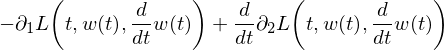

In [9]:
(Derivative(diff_positional(L, 2)(t,w(t), w(t).diff(t)), t) - 
 diff_positional(L, 1)(t,w(t), w(t).diff(t))) # :(

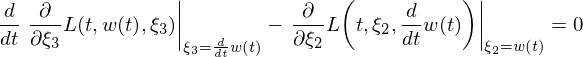

In [10]:
Lagrangian_eq = Eq(Derivative(L(t,w(t), w(t).diff(t)).fdiff(argindex=3),t, evaluate=False) - 
                   L(t,w(t), w(t).diff(t)).fdiff(argindex=2),
                   0, evaluate=False)
Lagrangian_eq # :) , although it doesn't use "positional derivative" operator explicitly

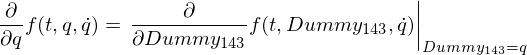

In [11]:
def Derivative_eq(f, argindex=1):
    d = Dummy()
    args = [d if i+1 == argindex else a for i,a in enumerate(f.args)]
    lhs = f.fdiff(argindex)
    rhs = Subs(f.func(*args).diff(d), d, f.args[argindex-1])
    return Eq(lhs, rhs, evaluate=False)

Derivative_eq(f(t,q,q_point),2) # applicative Derivative operator

In [12]:
def Gamma(w):
    return Lambda([t], (t, w(t), w(t).diff(t))) # state-space function

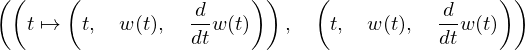

In [13]:
Gamma(w), Gamma(w)(t)

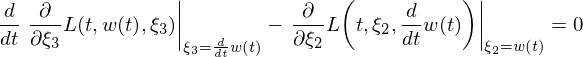

In [14]:
Lagrangian_eq = Eq(Derivative(L(*Gamma(w)(t)).fdiff(argindex=3),t, evaluate=False) - 
                   L(t,w(t), w(t).diff(t)).fdiff(argindex=2),
                   0, evaluate=False)
Lagrangian_eq

In [15]:
class FunctionsComposition(Function):

    nargs = 2
    
    def _latex(self, sexp):
        return r' \circ '.join(map(latex, 
                                   map(lambda a: a.func if isinstance(a, Function) else a, 
                                       self.args)))
    
    def _eval_subs(self, old, new):
        f, g = self.args
        if old == f:
            return new.subs({f.args[0]:g}, simultaneous=True)
            
    

In [22]:
F_o_w = FunctionsComposition(Function(r'\mathcal{F}')(t), w(t))
F_o_w

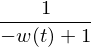

In [23]:
F_o_w.subs({Function(r'\mathcal{F}')(t):1/(1-t)})

In [24]:
F_o_w.subs({w(t):2*t})

In [25]:
_.subs({Function(r'\mathcal{F}')(t):2*t+1})

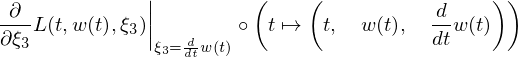

In [26]:
FunctionsComposition(L(t, w(t), w(t).diff(t)).fdiff(argindex=3),Gamma(w))

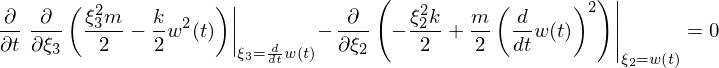

In [40]:
m,v,k,q = symbols('m v k q')
Lagrangian_eq.subs({L:Lambda([t,q,v], (m*v**2)/2-(k*q**2)/2)}) # plug in the Lagrangian function

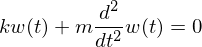

In [41]:
eq = _.doit() # do derivatives
eq

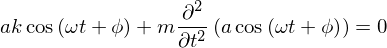

In [42]:
a, omega, phi = symbols(r'a \omega \phi')
_.subs({w(t):a*cos(omega*t+phi)})

In [43]:
_.doit().factor()

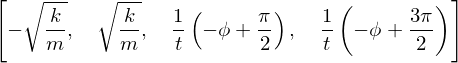

In [44]:
solve(_, omega)

In [45]:
dsolve(eq, w(t)) # solve with respect to path function w(t)

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.